# **Predicting Traffic Incident Severity Based on Weather and Time Factors**


## 1.0 **Description**

The goal of this project is to develop a predictive model that can estimate the severity of traffic incidents based on various factors such as weather conditions (rain, snow, fog, etc.) and time-related elements (time of day, day of the week, and holidays). The model will utilize historical traffic incident data from San Fransisco open data source, weather patterns, and temporal factors to predict the likelihood of incidents leading to severe outcomes, such as injuries or fatalities, rather than minor disruptions. This will help transportation authorities, emergency services, and city planners make data-driven decisions, optimize response strategies, and improve public safety.

## 1.1 Business Understanding

aiming to reduce the devastating consequences of road traffic accidents,this project employs machine learning to predict accident severity. The model, trained on data including vehicle type,casualty details,the type of the road, the location, the weather at the time of the accident just to mention a few, that can be used to inform proactive strategies aimed at reducing fatalities and injuries.

Traffic incidents contribute significantly to congestion, injuries, fatalities, and economic losses. Understanding the factors that influence the severity of these incidents can help reduce the overall impact on society. By leveraging data science to predict the severity of traffic incidents based on weather and time related variables, transportation agencies can:

- ```Improve Safety```: Predicting severe incidents allows for timely interventions, such as dispatching emergency services more effectively.


- ```Optimize Resource Allocation```: Traffic management and emergency responders can allocate resources in advance based on predicted severity, ensuring quicker response times in critical situations.

- ```Enhance Traffic Management```: Better understanding of incident severity can guide traffic signal optimization, road closures, and detour planning to minimize disruptions.

- ```Promote Public Awareness```: Through predictive insights, authorities can inform drivers about weather-related risks and encourage safer driving practices during high-risk periods.

This project aims to create a solution that not only reduces the severity of traffic incidents but also improves overall traffic flow and safety.

## 1.2 Objectives

1. Data collection:  The data was sourced from https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury/ubvf-ztfx/about_data

2. Data cleaning

3. Exploratory Data analysis

4. Feature Engineering

5. Model development

6. Model evaluation

7. Model deployment

## 1.3 Shareholders

- ```Transportation Authorities```: Local and regional traffic management departments who would benefit from predictive tools to optimize response times and reduce traffic disruptions.

- ```Emergency Services```: Police, fire departments, and medical teams who could use severity predictions to prepare resources and prioritize high-risk incidents.
- ```City Planners and Government Agencies```: Municipal decision makers focused on infrastructure planning and public safety initiatives could use these insights to improve roadways and safety measures.

- ```Public and Drivers```: The general public will benefit indirectly through increased safety, fewer severe accidents, and enhanced traffic management.

- ```Insurance Companies```: Insurers could use severity predictions to optimize their pricing models, assess risk in real-time, and process claims more efficiently.
- ```Weather Services```: Weather data providers may collaborate for deeper insights and provide better real-time forecasts for integrating into the system.

- ```Technology Providers```: Companies providing machine learning infrastructure, cloud services, and data collection tools will play a role in the development and deployment of the model.

## **2.0 Data Loading and Data Understanding**

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbaPipeline


# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data and printing out the head
data = pd.read_csv('Data\Traffic_Crashes_Resulting_in_Injury_20250305.csv')
data.head()

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,...,data_updated_at,data_loaded_at,analysis_neighborhood,supervisor_district,police_district,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,82049,20208000.0,8087000.0,230041955,37.734019,-122.388046,SFPD-INTERIM DB,CITY STREET,01/18/2023 05:53:00 PM,2023 January 18,...,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Bayview Hunters Point,10.0,BAYVIEW,2.0,9.0,1.0,86.0,86.0
1,82166,25723000.0,805000.0,230111655,37.762886,-122.428578,SFPD-INTERIM DB,CITY STREET,02/15/2023 09:30:00 AM,2023 February 15,...,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Castro/Upper Market,8.0,MISSION,3.0,5.0,5.0,37.0,37.0
2,41951,32862000.0,7826101.0,3491922,37.768636,-122.454858,SFPD-CROSSROADS,CITY STREET,11/11/2007 03:50:00 PM,2007 November 11,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,Golden Gate Park,5.0,PARK,7.0,11.0,12.0,9.0,9.0
3,48546,23904000.0,NaN,190523857,37.780363,-122.399080,SFPD-INTERIM DB,CITY STREET,07/19/2019 01:50:00 PM,2019 July 19,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,South of Market,6.0,SOUTHERN,1.0,10.0,34.0,32.0,32.0
4,35692,26705000.0,NaN,170390767,37.804146,-122.425110,SFPD-CROSSROADS,CITY STREET,05/11/2017 07:53:00 AM,2017 May 11,...,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,Russian Hill,2.0,CENTRAL,6.0,6.0,32.0,98.0,98.0


In [3]:
# understanding the shape of the data
shape = data.shape
print(shape)
print(f'the traffic data set has',shape[0] ,'rows and',shape[1],'columns')

(61229, 63)
the traffic data set has 61229 rows and 63 columns


In [4]:
# inspecting the columns
columns = data.columns
print(columns)

Index(['unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
       'tb_latitude', 'tb_longitude', 'geocode_source', 'geocode_location',
       'collision_datetime', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'time_cat', 'juris',
       'officer_id', 'reporting_district', 'beat_number', 'primary_rd',
       'secondary_rd', 'distance', 'direction', 'weather_1', 'weather_2',
       'collision_severity', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'intersection', 'vz_pcf_code', 'vz_pcf_group',
       'vz_pcf_description', 'vz_pcf_link', 'number_killed', 'number_injured',
       'street_view', 'dph_col_grp', 'dph_col_grp_description',
       'party_at_fault', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'point', 'data_as_of', 'data_updated_at',
       'data_

In [5]:
# checking info
info = data.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61229 entries, 0 to 61228
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   unique_id                     61229 non-null  int64  
 1   cnn_intrsctn_fkey             61207 non-null  float64
 2   cnn_sgmt_fkey                 27336 non-null  float64
 3   case_id_pkey                  61229 non-null  object 
 4   tb_latitude                   61062 non-null  float64
 5   tb_longitude                  61062 non-null  float64
 6   geocode_source                61229 non-null  object 
 7   geocode_location              61229 non-null  object 
 8   collision_datetime            61229 non-null  object 
 9   collision_date                61229 non-null  object 
 10  collision_time                61169 non-null  object 
 11  accident_year                 61229 non-null  int64  
 12  month                         61229 non-null  object 
 13  d

### 2.1 Dataset Description

#### Overview
This dataset contains information about traffic accidents, with a total of 61,229 entries. It includes various attributes related to the accident details, such as location, time, collision type, and injury data. The dataset is valuable for analysis related to traffic safety, accident severity, and patterns across different areas and conditions.

#### Features
The dataset consists of the following columns:

- **unique_id**: Unique identifier for each accident (int64).
- **cnn_intrsctn_fkey**: Foreign key linking to intersection data (float64).
- **cnn_sgmt_fkey**: Foreign key linking to segment data (float64).
- **case_id_pkey**: Primary key for case ID (object).
- **tb_latitude**: Latitude of the accident (float64).
- **tb_longitude**: Longitude of the accident (float64).
- **geocode_source**: Source of geocoding data (object).
- **geocode_location**: Geocoded location information (object).
- **collision_datetime**: Date and time of the collision (object).
- **collision_date**: Date of the collision (object).
- **collision_time**: Time of the collision (object).
- **accident_year**: Year of the accident (int64).
- **month**: Month of the accident (object).
- **day_of_week**: Day of the week when the accident occurred (object).
- **time_cat**: Time category of the accident (object).
- **juris**: Jurisdiction (object).
- **officer_id**: ID of the officer reporting the accident (object).
- **reporting_district**: District from which the report originated (object).
- **beat_number**: Beat number assigned to the report (object).
- **primary_rd**: Primary road involved in the accident (object).
- **secondary_rd**: Secondary road involved in the accident (object).
- **distance**: Distance from the reference point (float64).
- **direction**: Direction of travel (object).
- **weather_1**: Primary weather condition at the time of the accident (object).
- **weather_2**: Secondary weather condition (object).
- **collision_severity**: Severity of the collision (object).
- **type_of_collision**: Type of collision (object).
- **mviw**: Motor vehicle involvement (object).
- **ped_action**: Pedestrian action (object).
- **road_surface**: Condition of the road surface (object).
- **road_cond_1**: Primary road condition (object).
- **road_cond_2**: Secondary road condition (object).
- **lighting**: Lighting condition at the time of the accident (object).
- **control_device**: Type of traffic control device at the intersection (object).
- **intersection**: Whether the accident occurred at an intersection (object).
- **vz_pcf_code**: Code for the Vehicle-Zone Potential Conflict (object).
- **vz_pcf_group**: Grouping of the Vehicle-Zone Potential Conflict (object).
- **vz_pcf_description**: Description of the Vehicle-Zone Potential Conflict (object).
- **vz_pcf_link**: Link to more information about the potential conflict (object).
- **number_killed**: Number of people killed in the accident (float64).
- **number_injured**: Number of people injured in the accident (int64).
- **street_view**: Street view image URL of the accident location (object).
- **dph_col_grp**: Department of Public Health collision group (object).
- **dph_col_grp_description**: Description of the Department of Public Health collision group (object).
- **party_at_fault**: Party at fault for the accident (float64).
- **party1_type**: Type of the first party involved in the accident (object).
- **party1_dir_of_travel**: Direction of travel for the first party (object).
- **party1_move_pre_acc**: Movement of the first party before the accident (object).
- **party2_type**: Type of the second party involved in the accident (object).
- **party2_dir_of_travel**: Direction of travel for the second party (object).
- **party2_move_pre_acc**: Movement of the second party before the accident (object).
- **point**: Geospatial point data for the accident (object).
- **data_as_of**: Date the data was last updated (object).
- **data_updated_at**: Timestamp when the data was last updated (object).
- **data_loaded_at**: Timestamp when the data was loaded (object).
- **analysis_neighborhood**: Neighborhood where the accident occurred (object).
- **supervisor_district**: Supervisor district where the accident occurred (float64).
- **police_district**: Police district where the accident occurred (object).
- **Current Police Districts**: Police districts for the current data (float64).
- **Current Supervisor Districts**: Supervisor districts for the current data (float64).
- **Analysis Neighborhoods**: Neighborhoods relevant for analysis (float64).
- **Neighborhoods**: Neighborhoods associated with the accident (float64).
- **SF Find Neighborhoods**: Neighborhoods found by the SF Find algorithm (float64).

- **Missing values**: Some columns contain missing values. For example, `cnn_sgmt_fkey`, `party_at_fault`, and `party2_type` have missing data for some records.
  
#### Data Source
This dataset is sourced from San Fransisco Open data source

#### Usage
This dataset will be used for various analyses related to traffic accidents, including:
- Accident severity analysis
- Geospatial analysis of accident hotspots
- Study of weather, road conditions, and lighting effects on accidents
- Machine learning for predicting accident severity based on features like weather, location, and vehicle type



In [6]:
summury = data.describe().T
print(summury)

                                count          mean           std  \
unique_id                     61229.0  3.551137e+04  2.455893e+04   
cnn_intrsctn_fkey             61207.0  2.585379e+07  4.916555e+06   
cnn_sgmt_fkey                 27336.0  6.975567e+06  4.068037e+06   
tb_latitude                   61062.0  3.776579e+01  2.444219e-02   
tb_longitude                  61062.0 -1.224287e+02  2.834483e-02   
accident_year                 61229.0  2.014422e+03  5.705362e+00   
distance                      61150.0  5.596129e+01  2.638240e+02   
number_killed                 61226.0  9.799758e-03  1.016098e-01   
number_injured                61229.0  1.252903e+00  6.998025e-01   
party_at_fault                55163.0  1.013270e+00  1.247372e-01   
supervisor_district           60988.0  6.074342e+00  2.913055e+00   
Current Police Districts      60994.0  5.139833e+00  2.980160e+00   
Current Supervisor Districts  61015.0  6.688732e+00  3.365241e+00   
Analysis Neighborhoods        6099

In [7]:
# droping the unnecessary columns
data = data[['collision_date', 'collision_time','accident_year','month','day_of_week','primary_rd','secondary_rd','distance','direction','weather_1','collision_severity','type_of_collision','mviw','ped_action','road_surface','road_cond_1','lighting','dph_col_grp_description','control_device','number_killed','number_injured','party1_type', 'party1_dir_of_travel','party1_move_pre_acc','party2_type','party2_dir_of_travel','party2_move_pre_acc','time_cat']]
data.head()

,collision_date,collision_time,accident_year,month,day_of_week,primary_rd,secondary_rd,distance,direction,weather_1,...,control_device,number_killed,number_injured,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc,time_cat
0,2023 January 18,17:53:00,2023,January,Wednesday,LANE ST,NEWCOMB AVE,68.0,South,Clear,...,None,0.0,1,Driver,West,Proceeding Straight,NaN,NaN,NaN,2:01 pm to 6:00 pm
1,2023 February 15,09:30:00,2023,February,Wednesday,17TH ST,CHURCH ST,20.0,West,Clear,...,None,0.0,1,Bicyclist,East,Proceeding Straight,NaN,NaN,NaN,6:01 am to 10:00 am
2,2007 November 11,15:50:00,2007,November,Sunday,KEZAR DR,WALLER ST,210.0,North,Clear,...,None,0.0,2,Driver,North,Proceeding Straight,NaN,NaN,NaN,2:01 pm to 6:00 pm
3,2019 July 19,13:50:00,2019,July,Friday,PERRY ST,04TH ST,0.0,Not Stated,Clear,...,Functioning,0.0,1,Bicyclist,East,Making Left Turn,Driver,East,Making Left Turn,10:01 am to 2:00 pm
4,2017 May 11,07:53:00,2017,May,Thursday,BAY ST,VAN NESS AVE,0.0,Not Stated,Not Stated,...,Not Stated,0.0,1,Driver,North,Not Stated,Pedestrian,West,Not Stated,6:01 am to 10:00 am


In [8]:
# checking for null values
null = data.isna().sum()
print(null)

collision_date                0
collision_time               60
accident_year                 0
month                         0
day_of_week                   9
primary_rd                    0
secondary_rd                142
distance                     79
direction                     1
weather_1                     0
collision_severity            0
type_of_collision             0
mviw                          0
ped_action                    0
road_surface                  0
road_cond_1                   0
lighting                      0
dph_col_grp_description       1
control_device                0
number_killed                 3
number_injured                0
party1_type                  11
party1_dir_of_travel         11
party1_move_pre_acc          10
party2_type                4386
party2_dir_of_travel       4384
party2_move_pre_acc        4383
time_cat                     52
dtype: int64


## 2.2 Data Cleaning



In [9]:
# Convert all column names to lowercase
data.columns =data.columns.str.lower()

In [10]:
# checking for outliers
outliers_multiple_columns = pd.DataFrame()


exclude_columns = ['number_injured', 'number_killed']

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    
    if col not in exclude_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers_multiple_columns[col] = outliers[col]

# Calculate the sum of outliers for each column (excluding 'number_injured' and 'number_killed')
outliers_multiple_columns.sum()

accident_year          0.0
distance         2515101.0
dtype: float64

In [11]:
# caping outliers
for col in outliers_multiple_columns.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers to the upper and lower bounds
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [12]:
numeric_cols = ['distance', 'number_killed']
imputer = SimpleImputer(strategy='median')  # use median
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Impute categorical columns with 'Unknown' 
categorical_cols = ['party2_type', 'party2_dir_of_travel', 'party2_move_pre_acc']
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# For small missing data, impute with mode
data['day_of_week'] = data['day_of_week'].fillna(data['day_of_week'].mode()[0])

# Drop rows with small missing data
data = data.dropna(subset=['secondary_rd','collision_date', 'collision_time', 'party1_type', 'party1_dir_of_travel','party1_move_pre_acc','dph_col_grp_description','direction'])

In [13]:
data.isna().sum()

collision_date             0
collision_time             0
accident_year              0
month                      0
day_of_week                0
primary_rd                 0
secondary_rd               0
distance                   0
direction                  0
weather_1                  0
collision_severity         0
type_of_collision          0
mviw                       0
ped_action                 0
road_surface               0
road_cond_1                0
lighting                   0
dph_col_grp_description    0
control_device             0
number_killed              0
number_injured             0
party1_type                0
party1_dir_of_travel       0
party1_move_pre_acc        0
party2_type                0
party2_dir_of_travel       0
party2_move_pre_acc        0
time_cat                   0
dtype: int64

In [14]:
# Converting collision_date and collision_time to datetime
data['collision_date'] =pd.to_datetime(data['collision_date'])
data['collision_time'] = pd.to_datetime(data['collision_time'])

In [15]:
# Converting columns with repeated values to categorical type
categorical_columns = [ 'month', 'day_of_week',
    'direction', 'weather_1', 'collision_severity', 
    'type_of_collision', 'mviw', 'ped_action', 'road_surface', 'road_cond_1', 'lighting',
    'dph_col_grp_description', 'control_device', 'party1_type', 'party1_dir_of_travel',
    'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel', 'party2_move_pre_acc'
]
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.astype('category'))


In [16]:
#checking value counts for the target column
data['collision_severity'].value_counts()

Injury (Complaint of Pain)    38821
Injury (Other Visible)        17343
Injury (Severe)                4275
Fatal                           577
Medical                           1
Name: collision_severity, dtype: int64

In [17]:
#Drop rows where 'collision_severity' is 'Medical'
data = data[data['collision_severity'] != 'Medical']

In [18]:
# converting the entries in the collision_severity column into simplified labels like Pain, Visible, Severe,and Fatal.
severity_mapping = {
    'Injury (Complaint of Pain)': 'Pain',
    'Injury (Other Visible)': 'Visible',
    'Injury (Severe)': 'Severe',
    'Fatal': 'Fatal',
}

# Apply the mapping to the 'collision_severity' column
data['collision_severity'] = data['collision_severity'].replace(severity_mapping)

print(data['collision_severity'].value_counts())

Pain       38821
Visible    17343
Severe      4275
Fatal        577
Name: collision_severity, dtype: int64


In [19]:
data['weather_1'].value_counts()

Clear                       50263
Cloudy                       5940
Raining                      3607
Not Stated                    659
Fog                           258
Other                         231
Wind                           49
Snowing                         2
Other: Unknown                  1
Other: NOT ON SCENE             1
Other: NOT AT SCENE             1
Other: MISTING                  1
Fog / Visibility: 800 ft        1
Fog / Visibility: 10 ft         1
Fog / Visibility                1
Name: weather_1, dtype: int64

In [20]:
# Replace less informative or rare values with a more general category
data['weather_1'] = data['weather_1'].replace({
    'Other: Unknown': 'Other',
    'Other: NOT ON SCENE': 'Other',
    'Other: NOT AT SCENE': 'Other',
    'Other: MISTING': 'Other',
    'Fog / Visibility: 800 ft': 'Fog',
    'Fog / Visibility: 10 ft': 'Fog',
    'Fog / Visibility': 'Fog',
    'Snowing': 'Snow',  # Grouping different snow-related entries
    'Wind': 'Windy',  # Grouping wind-related values
})

# o drop values with very low frequency (e.g., 1 or 2 occurrences)
# Count the frequency of each value in the column
value_counts = data['weather_1'].value_counts()

# Filter out values that appear only once or twice and replace them with 'Other'
data['weather_1'] = data['weather_1'].apply(lambda x: x if value_counts[x] > 2 else 'Other')

# Check the cleaned column
print(data['weather_1'].value_counts())

Clear         50263
Cloudy         5940
Raining        3607
Not Stated      659
Fog             261
Other           237
Windy            49
Name: weather_1, dtype: int64


In [21]:
data['direction'].value_counts()

Not Stated    33719
South          7390
West           6771
East           6703
North          6432
North Nor         1
Name: direction, dtype: int64

In [22]:
data['direction'] = data['direction'].replace({
    'North Nor': 'North',
})

# Group 'Not Stated' into a more general 'Unknown' category
data['direction'] = data['direction'].replace({
    'Not Stated': 'Unknown',
})


# Check the cleaned column
print(data['direction'].value_counts())

Unknown    33719
South       7390
West        6771
East        6703
North       6433
Name: direction, dtype: int64


In [23]:
data['lighting'].value_counts()

Daylight                                39351
Dark - Street Lights                    18383
Dusk - Dawn                              2138
Not Stated                                596
Dark - No Street Lights                   439
Dark - Street Lights Not Functioning      109
Name: lighting, dtype: int64

In [24]:
data['lighting'] = data['lighting'].replace({
    'Dark - Street Lights Not Functioning': 'Dark',  
    'Dark - No Street Lights': 'Dark',  
    'Not Stated': 'Unknown',  
})

#merge 'Dusk - Dawn' with 'Daylight' 
data['lighting'] = data['lighting'].replace({
    'Dusk - Dawn': 'Daylight',  
})

# Check the cleaned column
print(data['lighting'].value_counts())

Daylight                41489
Dark - Street Lights    18383
Unknown                   596
Dark                      548
Name: lighting, dtype: int64


## 3.0 **Exploratory Data Analysis**

#### 3.1 Univariate Analysis

In [25]:
day_severity_count=data.groupby(['day_of_week','collision_severity']).size().reset_index(name='count')
pvt_table=pd.pivot_table(day_severity_count,values='count',index=['day_of_week'],columns=['collision_severity'],aggfunc='sum')
pvt_table

collision_severity,Fatal,Pain,Severe,Visible
day_of_week,,,,
Friday,87,6086,697,2687
Monday,68,5315,544,2338
Saturday,90,5170,606,2517
Sunday,74,4701,562,2159
Thursday,89,5849,636,2498
Tuesday,86,5821,626,2533
Wednesday,83,5879,604,2611


- The higher numbers of accidents on Friday and Saturday, particularly for "Pain" and "Visible" categories, might be related to increased social activity, weekend travel, or other factors associated with the end of the work week and the weekend.

- The higher number of fatal collisions on these days is also worth noting and investigating.

- The lower numbers on Sunday could be attributed to reduced traffic volume, different driving patterns, or other factors.

- Across all days, "Pain" and "Visible" collisions are much more frequent than "Severe" and "Fatal" collisions, which aligns with the general understanding that minor accidents are more common.

In [26]:
month_severity_count=data.groupby(['month','collision_severity']).size().reset_index(name='count')
pvt_table_m=pd.pivot_table(month_severity_count,values='count',index=['month'],columns=['collision_severity'],aggfunc='sum')
pvt_table_m

collision_severity,Fatal,Pain,Severe,Visible
month,,,,
April,34,3089,330,1455
August,56,3290,351,1484
December,63,3406,338,1219
February,42,3118,329,1298
January,39,3194,299,1317
July,42,2949,387,1478
June,47,3022,362,1490
March,57,3292,376,1439
May,50,3136,338,1440


- The high number of accidents in October could be due to various factors, such as:
Changes in weather conditions (e.g., increased rainfall, fog in some regions)
Increased traffic volume due to specific events or activities
Reduced daylight hours in some areas

- June and July's Lower Accident Rate: The lower numbers in June and July might be attributed to factors such as:
  - School holidays, which could lead to changes in commuting patterns
  - More daylight hours
  - Potentially drier weather conditions in some areas

- Similar to the day-of-week data, "Pain" and "Visible" collisions are much more frequent than "Severe" and "Fatal" collisions across all months, reinforcing the general trend that less severe accidents are more common.

In [27]:
weather_severity_count=data.groupby(['weather_1','collision_severity']).size().reset_index(name='count')
pvt_table_w=pd.pivot_table(weather_severity_count,values='count',index=['weather_1'],columns=['collision_severity'],aggfunc='sum')
pvt_table_w


collision_severity,Fatal,Pain,Severe,Visible
weather_1,,,,
Clear,455.0,31831.0,3563.0,14414.0
Cloudy,64.0,3731.0,403.0,1742.0
Fog,5.0,143.0,22.0,91.0
Not Stated,16.0,431.0,50.0,162.0
Other,5.0,148.0,22.0,62.0
Raining,32.0,2505.0,208.0,862.0
Windy,NaN,32.0,7.0,10.0


- The high number of accidents in clear weather emphasizes that weather is not the only, or even primary, cause of many accidents. Driver behavior, traffic density, and other factors are crucial.

- The "Not Stated" category highlights the need for better data collection practices to ensure accurate and complete information.

- While clear weather dominates, the data shows that adverse weather conditions like "Cloudy," "Raining," and "Fog" do correlate with accidents, as expected.

- The low number of accidents in windy conditions might suggest that extreme wind is less frequently a direct cause of accidents.

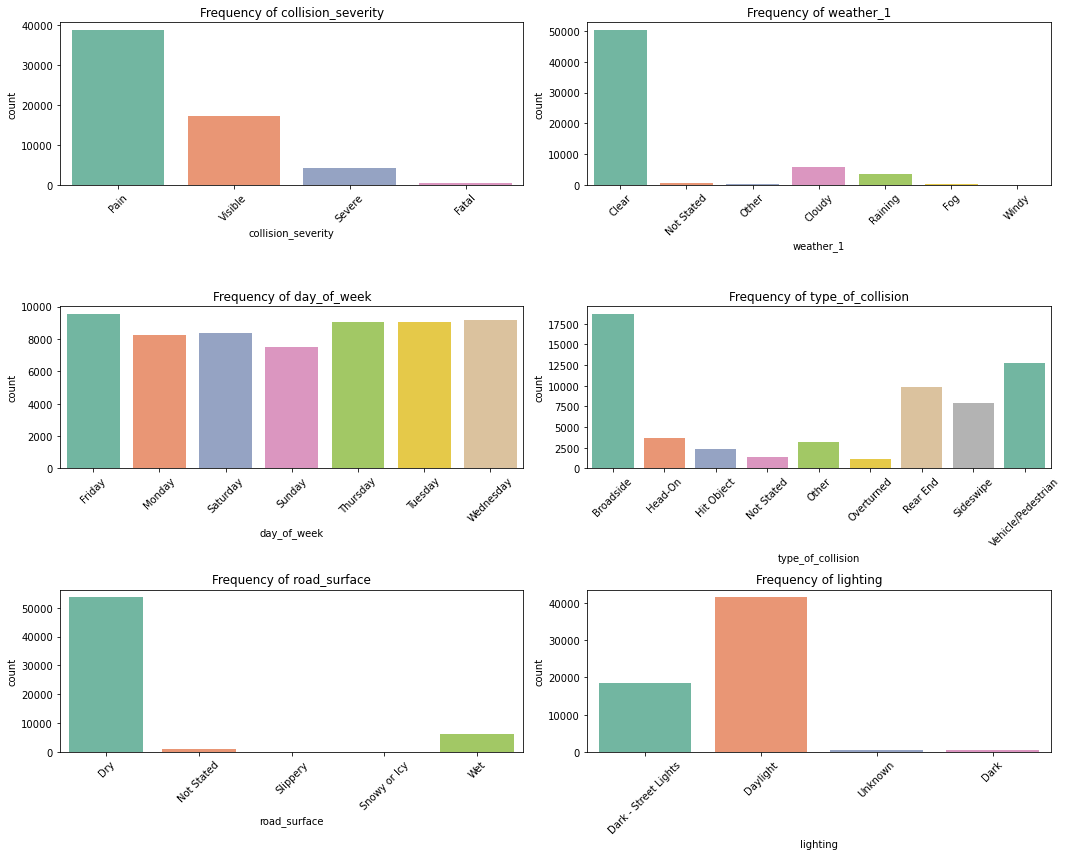

In [28]:
# Bar plot for categorical columns

categorical_columns = ['collision_severity', 'weather_1', 'day_of_week', 'type_of_collision', 'road_surface', 'lighting']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=data[col], palette='Set2')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


`Key Takeaways:`

- Clear Weather and Dry Roads: Collisions most often occur in clear weather and on dry roads, suggesting that weather and road conditions are not the only factors contributing to accidents.

- Daylight Hours: Collisions are more frequent during daylight hours, which likely correlates with higher traffic volume.

- Data Completeness: The "Not Stated" categories in some charts highlight potential data gaps and the need for more complete information in future studies.

- Collision Types: Broadside and rear-end collisions are common types of accidents.

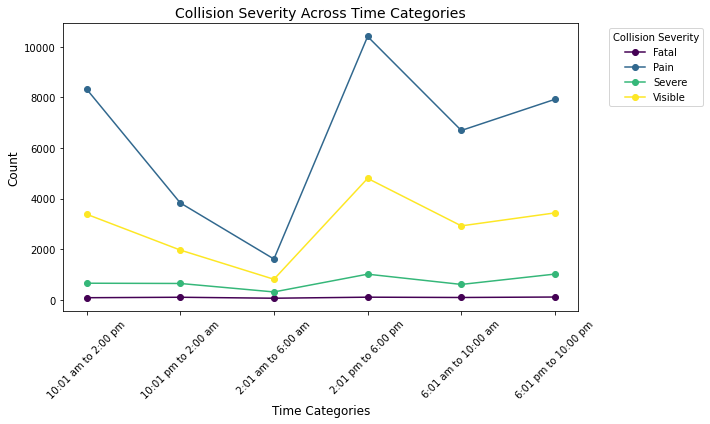

In [29]:
#Time of day versus severity
time_severity = data.groupby(['time_cat', 'collision_severity']).size().unstack(fill_value=0)
time_severity.plot(kind='line', figsize=(10, 6), marker='o', colormap='viridis')
plt.title('Collision Severity Across Time Categories', fontsize=14)
plt.xlabel('Time Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Collision Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Time category "2:01 pm to 6:00 pm" is the most critical period:**

 It shows the highest collision counts for multiple severities. Specifically, injuries categorized as " Pain" peak with over 10,000 collisions, and "Visible" injuries also see significant numbers near 4,000. This indicates a high concentration of traffic activity or risk factors during this period, possibly due to peak hours or increased road usage.

**"6:01 am to 10:00 am" also shows elevated activity:**

Likely corresponding to morning commute hours, this interval ranks second in terms of injury counts, making it another key focus for safety measures.

**Low collision counts during late night and early morning hours:**

Time intervals like "10:01 pm to 2:00 am" and "2:01 am to 6:00 am" show comparatively fewer collisions across all severities. This might reflect decreased traffic volume during these hours.

**Fatalities (purple line)  remain low throughout:**

These category show near-constant low counts across all time intervals, suggesting they are rarer events compared to injuries.

**Take out:**

Overall, the plot suggests traffic safety interventions might be most effective if targeted at the afternoon to early evening and morning commute periods. It also highlights that less severe injuries dominate traffic incidents across all time categories, potentially pointing to areas where preventative measures could reduce overall collision rates.

In [30]:
data.columns

Index(['collision_date', 'collision_time', 'accident_year', 'month',
       'day_of_week', 'primary_rd', 'secondary_rd', 'distance', 'direction',
       'weather_1', 'collision_severity', 'type_of_collision', 'mviw',
       'ped_action', 'road_surface', 'road_cond_1', 'lighting',
       'dph_col_grp_description', 'control_device', 'number_killed',
       'number_injured', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'time_cat'],
      dtype='object')

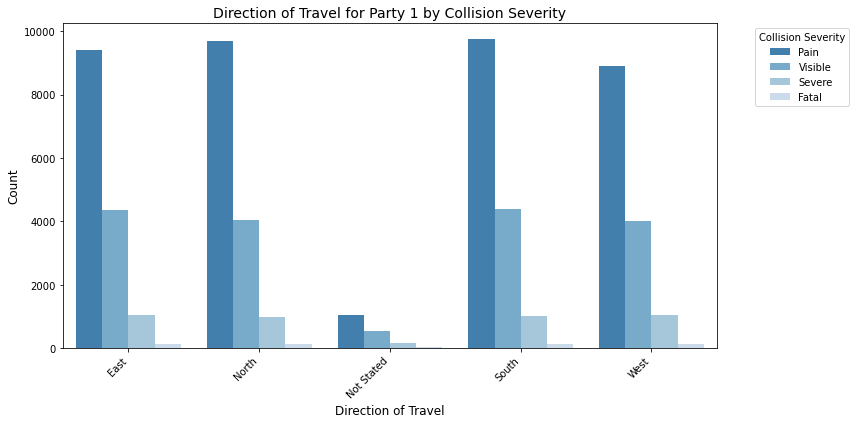

In [31]:
#Direction of parties involved in accidents
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='party1_dir_of_travel', hue='collision_severity', palette='tab20c')
plt.title('Direction of Travel for Party 1 by Collision Severity', fontsize=14)
plt.xlabel('Direction of Travel', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Collision Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



- Across all directions of travel (West, East, North, South), "Pain" is the most common collision severity. This could indicate that minor injuries are far more frequent than severe outcomes for all directions.


- Categories like "Severe"," "Fatal," and "Visible" show much lower counts in all directions. This could be indicative of either improved road safety measures or the rarity of severe accidents.


- Certain directions (e.g., West or East) may show relatively higher counts of collisions. This could warrant further exploration—do these directions correspond to busier roads or specific times of day?


- The "Not Stated" category has significantly lower counts across all severities. This could be due to incomplete reporting or cases where direction wasn't a contributing factor.

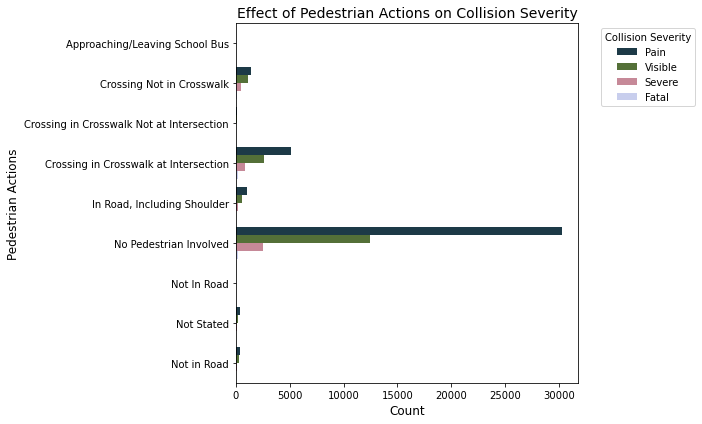

In [32]:
#Effect of pedestrian action on collision severity
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='ped_action', hue='collision_severity', palette='cubehelix')
plt.title('Effect of Pedestrian Actions on Collision Severity', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Pedestrian Actions', fontsize=12)
plt.legend(title='Collision Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**No Pedestrian Involved dominates the data:** 
This category shows the highest number of collisions, which likely reflects the majority of incidents where pedestrians are not a factor. It highlights the predominance of vehicle-to-vehicle collisions.

**Crossing in Crosswalk at Intersection is the second-largest contributor:** 
Among pedestrian-specific actions, this category stands out. This may indicate higher pedestrian activity at intersections, which are often busy and complex traffic zones.

**Crossing Not in Crosswalk also shows notable collision counts:** 
This suggests that jaywalking or crossing outside designated zones can increase collision risks, though it remains less frequent than crosswalk-related incidents.

**Rare pedestrian actions like Approaching/Leaving School Bus have minimal data:**
These categories show very few collisions, possibly because they are less common pedestrian behaviors or reflect successful safety measures in these scenarios.

**Severe injuries and fatalities are relatively small across all categories:**
The purple and yellow segments (representing fatal and severe injuries) are minor compared to less severe outcomes like "Pain," suggesting that while severe outcomes exist, they are less frequent.

This analysis highlights the importance of focusing safety interventions on high-risk pedestrian behaviors and locations, such as crosswalks at intersections.

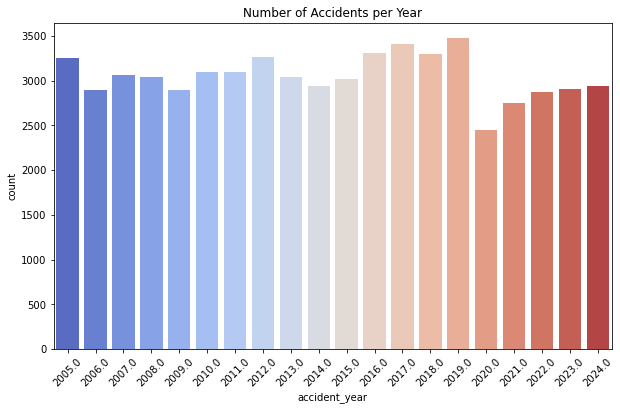

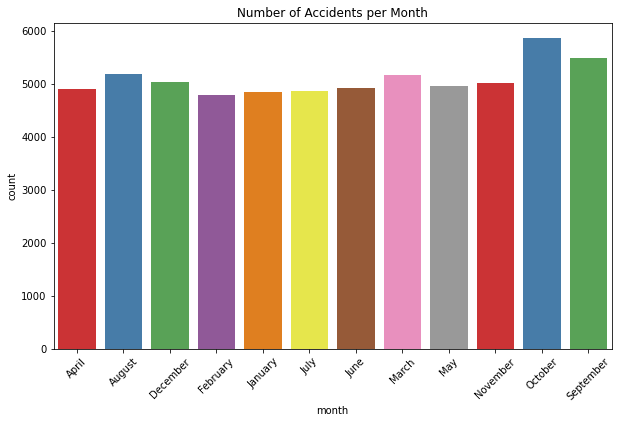

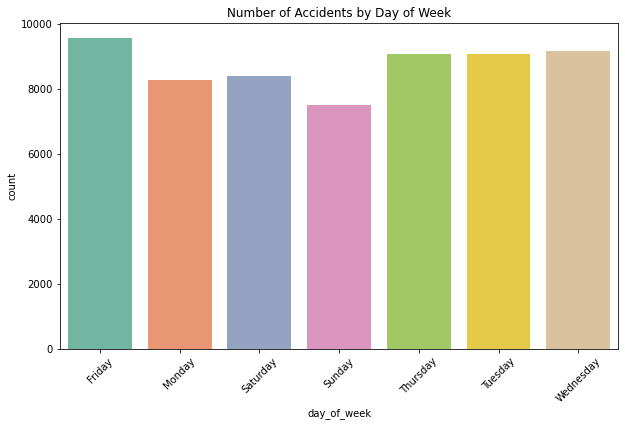

In [33]:
# Distribution of accidents over the year
plt.figure(figsize=(10, 6))
sns.countplot(x=data['accident_year'], palette='coolwarm')
plt.title('Number of Accidents per Year')
plt.xticks(rotation=45)
plt.show()

# Distribution of accidents by month
plt.figure(figsize=(10, 6))
sns.countplot(x=data['month'], palette='Set1')
plt.title('Number of Accidents per Month')
plt.xticks(rotation=45)
plt.show()

# Distribution of accidents by day of week
plt.figure(figsize=(10, 6))
sns.countplot(x=data['day_of_week'], palette='Set2')
plt.title('Number of Accidents by Day of Week')
plt.xticks(rotation=45)
plt.show()


- There appears to be a noticeable increase in accidents in the later years (around 2017-2019).

- There's a visible drop in accidents in the most recent years (2020-2023). This could potentially be related to external factors or changes in data collection.

- Friday shows the highest number of accidents, suggesting it's the most accident-prone day of the week.

- Sunday has the lowest number of accidents, indicating it's the safest day (in terms of accident frequency).

- Thursday, Tuesday, and Wednesday also have relatively high accident counts, comparable to Friday.

- Monday and Saturday fall somewhere in the middle, with a moderate number of accidents.

- October shows the highest number of accidents, indicating it's the most accident-prone month.

- June and July have relatively lower accident counts compared to other months.
Relatively High Counts: August, September, April, and November also show relatively high accident counts.

- The remaining months (December, February, January, March, May) have moderate accident counts.

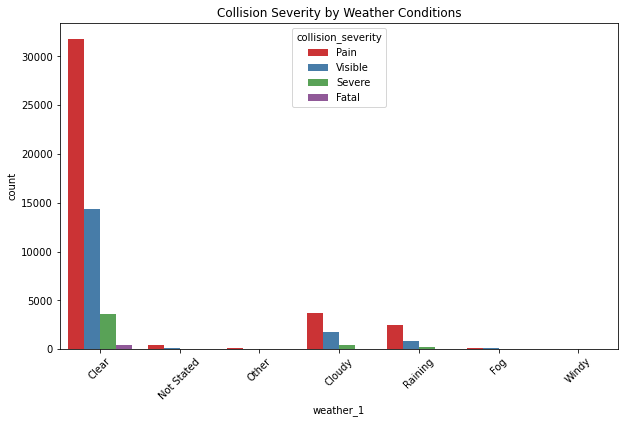

In [34]:
# weather and collision severity
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_1', hue='collision_severity', data=data, palette='Set1')
plt.title('Collision Severity by Weather Conditions')
plt.xticks(rotation=45)
plt.show()

- Clear Weather Risk: While seemingly safe, clear weather can still lead to a high number of collisions, likely due to factors like increased traffic volume or driver complacency.

- Adverse Weather Impact: While less frequent, adverse weather conditions like rain can still contribute to collisions, particularly those with less severe injuries.

- Data Quality: The "Not Stated" category highlights the importance of accurate data collection for meaningful analysis.

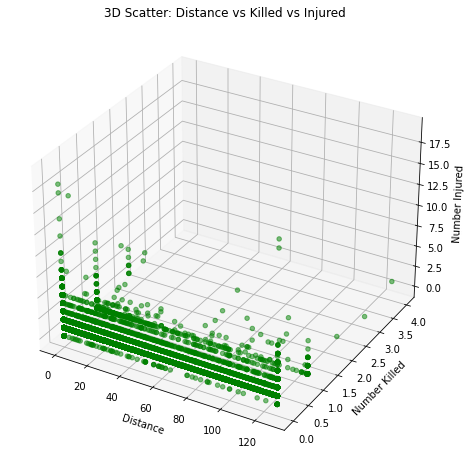

In [35]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['distance'], data['number_killed'],data['number_injured'], alpha=0.5, color='green')
ax.set_xlabel('Distance')
ax.set_ylabel('Number Killed')
ax.set_zlabel('Number Injured')
plt.title('3D Scatter: Distance vs Killed vs Injured')
plt.show()

- Severity Clustering: The clustering of data points at low values suggests that incidents with low numbers of fatalities and injuries are more common.

- Potential for High-Severity Outliers: The presence of outliers indicates the possibility of events with unusually high numbers of casualties, which might warrant further investigation.

- Limited Distance Correlation: The lack of a clear pattern with distance suggests that distance alone may not be a strong predictor of the severity of an incident (number of killed or injured).

**droping more columns**

In [36]:
data = data.drop(columns = ['collision_date', 'collision_time','accident_year','primary_rd', 'secondary_rd','direction', 'mviw','road_cond_1','dph_col_grp_description','party1_type','party2_type','time_cat'], axis = 1)

In [37]:
data.columns

Index(['month', 'day_of_week', 'distance', 'weather_1', 'collision_severity',
       'type_of_collision', 'ped_action', 'road_surface', 'lighting',
       'control_device', 'number_killed', 'number_injured',
       'party1_dir_of_travel', 'party1_move_pre_acc', 'party2_dir_of_travel',
       'party2_move_pre_acc'],
      dtype='object')

## 4.0 **Hypothesis testing**

#### 4.1 Chi-Square Test for Weather and Collision Severity

In [38]:

import scipy.stats as stats


contingency_table = pd.crosstab(data['weather_1'], data['collision_severity'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 Stat: {chi2_stat}")
print(f"P-Value: {p_value}")


alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: Weather significantly affects collision severity.")
else:
    print("Fail to reject the null hypothesis: No significant effect of weather on collision severity.")

Chi2 Stat: 100.94079250555873
P-Value: 1.4889686165316802e-13
Reject the null hypothesis: Weather significantly affects collision severity.


#### 4.2 ANOVA for Road Surface and Number of Injuries

In [39]:

road_surface_groups = [data[data['road_surface'] == road_surface]['number_injured'] for road_surface in data['road_surface'].unique()]

# Conducting ANOVA
f_stat, p_value = stats.f_oneway(*road_surface_groups)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpreting the result
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: Road surface conditions affect the number of injuries.")
else:
    print("Fail to reject the null hypothesis: No significant effect of road surface on the number of injuries.")



F-statistic: 5.782776049218737
P-value: 0.00011943359812118098
Reject the null hypothesis: Road surface conditions affect the number of injuries.


In [40]:
# Separating the categorical and numerical columns
categorical_cols = data.drop(columns =['number_killed','number_injured','distance'])
categorical_cols.head()

,month,day_of_week,weather_1,collision_severity,type_of_collision,ped_action,road_surface,lighting,control_device,party1_dir_of_travel,party1_move_pre_acc,party2_dir_of_travel,party2_move_pre_acc
0,January,Wednesday,Clear,Pain,Overturned,No Pedestrian Involved,Dry,Dark - Street Lights,None,West,Proceeding Straight,Unknown,Unknown
1,February,Wednesday,Clear,Pain,Other,No Pedestrian Involved,Dry,Daylight,None,East,Proceeding Straight,Unknown,Unknown
2,November,Sunday,Clear,Visible,Hit Object,No Pedestrian Involved,Dry,Daylight,None,North,Proceeding Straight,Unknown,Unknown
3,July,Friday,Clear,Pain,Broadside,No Pedestrian Involved,Dry,Daylight,Functioning,East,Making Left Turn,East,Making Left Turn
4,May,Thursday,Not Stated,Pain,Not Stated,Not Stated,Not Stated,Unknown,Not Stated,North,Not Stated,West,Not Stated


In [41]:
numeric_cols = data[['number_killed','number_injured','distance']]
numeric_cols.head()

,number_killed,number_injured,distance
0,0.0,1,68.0
1,0.0,1,20.0
2,0.0,2,127.5
3,0.0,1,0.0
4,0.0,1,0.0


<AxesSubplot:>

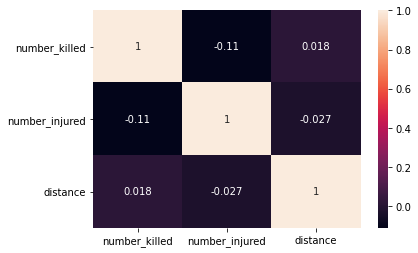

In [42]:
# Using the numerical columns to explore correlations since the correlation is only useful for quantitative variables. 
# Correlation shows they relate to each other.Because regression techniques represent the relationship in which the independent variable affects the dependent variable, 
# the weight for that variable in the regression formula may vary depending on the direction and strength of the correlation.

corr = numeric_cols.corr()
sns.heatmap(corr,annot = True)

The formula used to calculate the correlation above is the pearson correlation coefficient that shows the linear relationship between two variables. 1 means a perfect positive linear correlation, -1 means that there is a perfect negative correlation and 0 meand thet there is no linear correlation. the graph above shows that the variable that shows the strongest linear with number killed is number injured though a negative relationship.

It is recommended that we use the pair plot together with the correlation graph to comprehensively investigate correlation between variables.The pairplot provided by the seaborn library visualizes and shows the correlation of seach variable below:

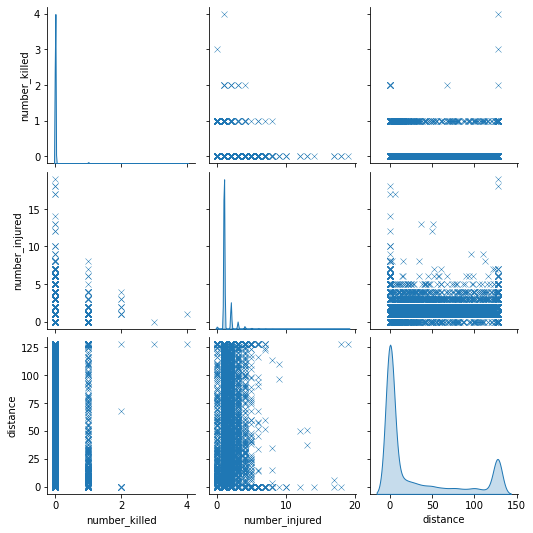

In [43]:
sns.pairplot(numeric_cols,markers = 'x',diag_kind= 'kde')

Lookingg at the pairplot we can see that most of the data is skewed to the left rater than evenly distributed.

We can therefore visualize the distribution through a histogram.

array([[<AxesSubplot:title={'center':'number_killed'}>,
        <AxesSubplot:title={'center':'number_injured'}>],
       [<AxesSubplot:title={'center':'distance'}>, <AxesSubplot:>]],
      dtype=object)

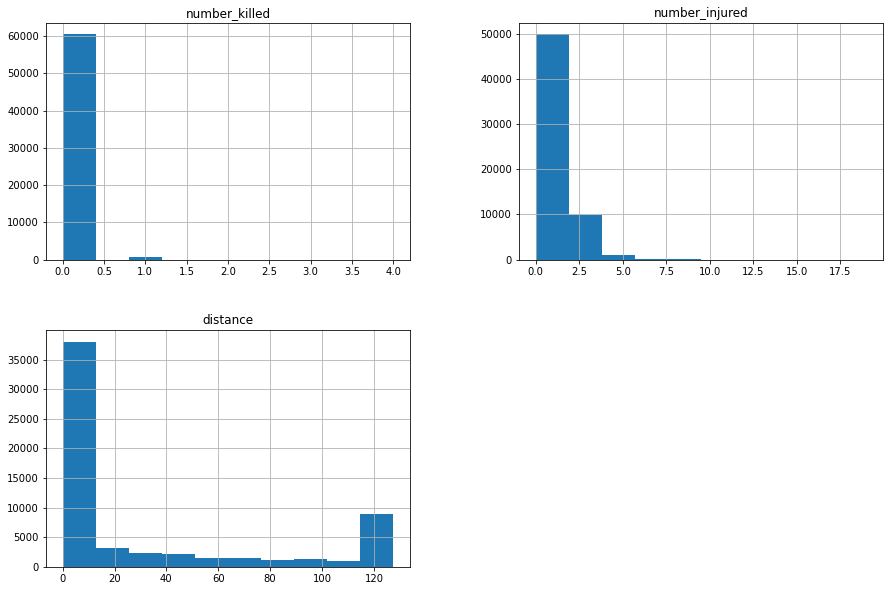

In [44]:
numeric_cols.hist(figsize=(15,10))

Logistic regression is an appropriate regression technique for a data closer to a normal distribution therefore data shown above isn't appropriate for applying it. 

We can apply the Log Transformation to bring such extreme data close to a normal distribution.

array([[<AxesSubplot:title={'center':'number_killed'}>,
        <AxesSubplot:title={'center':'number_injured'}>],
       [<AxesSubplot:title={'center':'distance'}>, <AxesSubplot:>]],
      dtype=object)

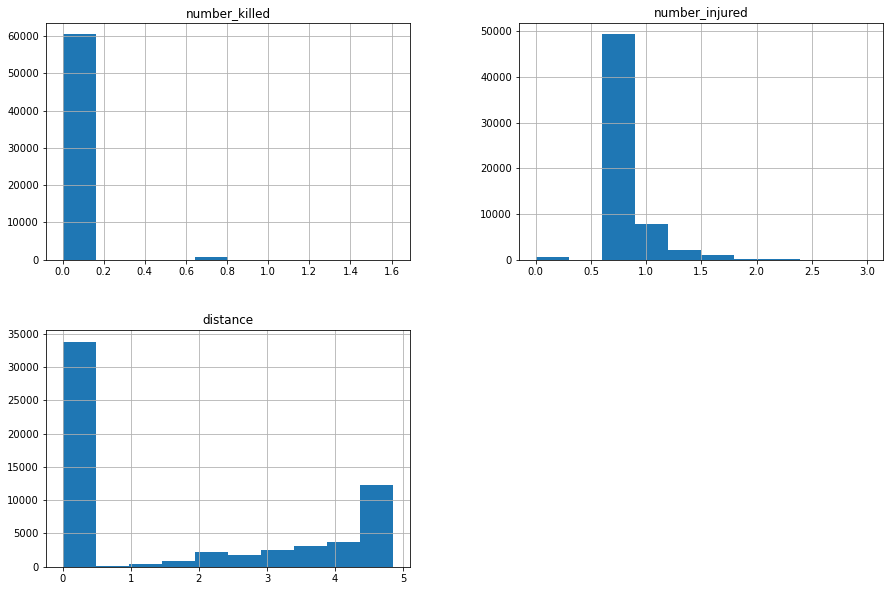

In [45]:
numeric_data_log = np.log(numeric_cols +1) #Since the values of 0 and 1 return negative values we add 1 to the whole data and apply the function
numeric_data_log.hist(figsize=(15,10))

<AxesSubplot:>

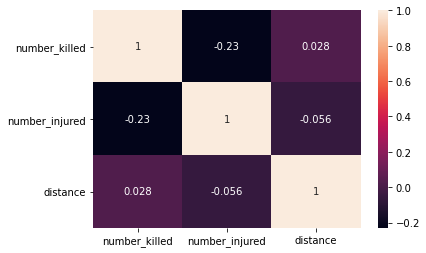

In [46]:
corr = numeric_data_log.corr()
sns.heatmap(corr,annot = True)

There is a notable change in the distribution after applying  log transformation on the numerical columns

In [47]:
# Combine Categorical data and the numeric_data_log in preparation of modelling

data = pd.concat([categorical_cols , numeric_data_log], axis=1) 
data.head()

,month,day_of_week,weather_1,collision_severity,type_of_collision,ped_action,road_surface,lighting,control_device,party1_dir_of_travel,party1_move_pre_acc,party2_dir_of_travel,party2_move_pre_acc,number_killed,number_injured,distance
0,January,Wednesday,Clear,Pain,Overturned,No Pedestrian Involved,Dry,Dark - Street Lights,None,West,Proceeding Straight,Unknown,Unknown,0.0,0.693147,4.234107
1,February,Wednesday,Clear,Pain,Other,No Pedestrian Involved,Dry,Daylight,None,East,Proceeding Straight,Unknown,Unknown,0.0,0.693147,3.044522
2,November,Sunday,Clear,Visible,Hit Object,No Pedestrian Involved,Dry,Daylight,None,North,Proceeding Straight,Unknown,Unknown,0.0,1.098612,4.855929
3,July,Friday,Clear,Pain,Broadside,No Pedestrian Involved,Dry,Daylight,Functioning,East,Making Left Turn,East,Making Left Turn,0.0,0.693147,0.000000
4,May,Thursday,Not Stated,Pain,Not Stated,Not Stated,Not Stated,Unknown,Not Stated,North,Not Stated,West,Not Stated,0.0,0.693147,0.000000


### **5.0 Modeling**

In [48]:
# Define the target and features
X = data.drop(columns=['collision_severity'])
y = data['collision_severity']

# Encode target variable using Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This will encode 'fatal', 'severe', 'visible', 'pain' into 0, 1, 2, 3

# Define categorical and numerical columns
categorical_cols = ['weather_1','type_of_collision','ped_action','road_surface','lighting', 
                   'control_device','party1_dir_of_travel', 
                    'party1_move_pre_acc','party2_dir_of_travel','party2_move_pre_acc', 
                    'month','day_of_week']
numerical_cols = ['distance','number_killed','number_injured']

# Preprocessing for numerical data: Impute missing values and scale the data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Helper function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Create and evaluate the pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Decode the predicted labels back to original target labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)

    # Print evaluation metrics
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test_decoded, y_pred_decoded))
    print(f"{model_name} - Confusion Matrix:")
    print(confusion_matrix(y_test_decoded, y_pred_decoded))
 # 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# 2. Logistic Regression (Multinomial)
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
train_and_evaluate_model(log_reg_model, X_train, X_test, y_train, y_test, "Logistic Regression")

# 3. Support Vector Classifier (SVC)
svc_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
train_and_evaluate_model(svc_model, X_train, X_test, y_train, y_test, "Support Vector Classifier")

# 4. k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn_model, X_train, X_test, y_train, y_test, "k-Nearest Neighbors")

# 5. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_and_evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")


Random Forest - Classification Report:
              precision    recall  f1-score   support

       Fatal       0.98      1.00      0.99       103
        Pain       0.67      0.88      0.76      7850
      Severe       0.09      0.01      0.02       832
     Visible       0.38      0.19      0.25      3419

    accuracy                           0.63     12204
   macro avg       0.53      0.52      0.51     12204
weighted avg       0.55      0.63      0.57     12204

Random Forest - Confusion Matrix:
[[ 103    0    0    0]
 [   1 6896   63  890]
 [   0  640   11  181]
 [   1 2726   45  647]]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

       Fatal       0.98      1.00      0.99       103
        Pain       0.67      0.95      0.78      7850
      Severe       0.00      0.00      0.00       832
     Visible       0.43      0.11      0.18      3419

    accuracy                           0.65     12204
   macro avg       0.52   

**Key Insights:**

`Fatal accidents:` All models perform well in predicting fatal accidents (high precision and recall). This is likely because fatal accidents are rare but distinct, making them easier to classify.

`Pain accidents:` Most models perform decently on this class, with high recall but moderate precision (especially in Random Forest, Logistic Regression, and SVC).

`Severe and Visible accidents:` All models struggle with these classes, especially Severe, where recall and precision are very low. The low recall for Visible also suggests that the models are misclassifying a large portion of these cases.

`Class imbalance:` Pain accidents dominate the dataset (given their high support), and the models may struggle to differentiate between Severe and Visible accidents due to this imbalance.

**Handling Class Imbalance:**

- SMOTE (Synthetic Minority Over-sampling Technique) or undersampling to balance the class distribution.

**Model Tuning:**

Perform hyperparameter tuning (using GridSearchCV ) to optimize the models and improve performance, especially for the Severe and Visible classes.
Model Ensemble:

**Conclusion:**

XGBoost, Logistic regression and SVC iare the better models overall in terms of accuracy (65%).

XGBoost seems to be the better choice overall, but further improvements can be made by addressing class imbalance and model tuning for the models

**Checking for feature importance**

- Before applying Smote and Gridsearch, it is important to reduce the number of columns and this can be achieaved by checking for feature importance

- random forest and XGBoost will be used to get the most important features for further modeling because it is easy to obtain the importance of features through ```feature_importances_``` attribute

In [49]:
# 1. Extract feature importance for Random Forest and XGBoost
rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_

# 2. Get the feature names after preprocessing (after one-hot encoding)
categorical_columns = categorical_cols  # List of categorical columns
num_columns = numerical_cols  # List of numerical columns

# Fit the preprocessor to the full dataset 
preprocessor.fit(X, y_encoded)

# Get feature names after one-hot encoding
num_features = num_columns  # Numerical features stay the same
cat_features = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_columns)

# Combine numerical and categorical feature names
all_feature_names = np.concatenate([num_features, cat_features])

# Ensure feature importance arrays match the number of features
assert len(all_feature_names) == len(rf_importance), "Mismatch in feature lengths for Random Forest"
assert len(all_feature_names) == len(xgb_importance), "Mismatch in feature lengths for XGBoost"

# 3. Combine feature importances into a DataFrame
importance_data = {
    'Feature': all_feature_names,
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance
}

importance_df = pd.DataFrame(importance_data)

# 4. Sort the feature importances by 'Random Forest' (descending order)
rf_sorted = importance_df.sort_values(by='Random Forest', ascending=False)

# 5. Sort the feature importances by 'XGBoost' (descending order)
xgb_sorted = importance_df.sort_values(by='XGBoost', ascending=False)

# Display the sorted DataFrames
print("\nSorted Feature Importances for Random Forest:")
print(rf_sorted[['Feature', 'Random Forest']])

print("\nSorted Feature Importances for XGBoost:")
print(xgb_sorted[['Feature', 'XGBoost']])


Sorted Feature Importances for Random Forest:
                                               Feature  Random Forest
0                                             distance       0.077285
2                                       number_injured       0.048433
109                                 day_of_week_Friday       0.022093
115                              day_of_week_Wednesday       0.021825
113                               day_of_week_Thursday       0.021649
..                                                 ...            ...
77      party2_move_pre_acc_Crossed Into Opposing Lane       0.000085
25                              ped_action_Not In Road       0.000061
86            party2_move_pre_acc_Other Unsafe Turning       0.000057
78   party2_move_pre_acc_Crossed Into Opposing Lane...       0.000053
68         party1_move_pre_acc_Xing into Opposing Lane       0.000003

[116 rows x 2 columns]

Sorted Feature Importances for XGBoost:
                                              Fe

**Top 10 most important features**
- here we want to display the 10 most important features so that they are used for further modeling

In [50]:
# Get the top 10 features for Random Forest
top_rf_features = rf_sorted.head(10)

# Get the top 10 features for XGBoost
top_xgb_features = xgb_sorted.head(10)

# Display the results
print("Top 10 Features for Random Forest:")
print(top_rf_features[['Feature', 'Random Forest']])

print("\nTop 10 Features for XGBoost:")
print(top_xgb_features[['Feature', 'XGBoost']])

Top 10 Features for Random Forest:
                        Feature  Random Forest
0                      distance       0.077285
2                number_injured       0.048433
109          day_of_week_Friday       0.022093
115       day_of_week_Wednesday       0.021825
113        day_of_week_Thursday       0.021649
114         day_of_week_Tuesday       0.021387
45   party1_dir_of_travel_South       0.020961
42    party1_dir_of_travel_East       0.020876
111        day_of_week_Saturday       0.020670
46    party1_dir_of_travel_West       0.020646

Top 10 Features for XGBoost:
                                 Feature   XGBoost
1                          number_killed  0.174715
16            type_of_collision_Rear End  0.090619
73          party2_dir_of_travel_Unknown  0.046718
24     ped_action_No Pedestrian Involved  0.024898
20  ped_action_Crossing Not in Crosswalk  0.023585
87            party2_move_pre_acc_Parked  0.022097
94   party2_move_pre_acc_Stopped In Road  0.014102
14        

- from the above top 10 most important features, we settled with 'distance', 'number_injured', 'day_of_week', 
                     'party1_dir_of_travel', 'number_killed', 
                     'type_of_collision', 'party2_dir_of_travel' as the feature to continue with for the models

- Since XGBoost and Logistic perform better in terms of accuracy, we use these 10 most important features for further modeling with the two

In [52]:
# List of selected features based on importance 
selected_features = ['distance', 'number_injured', 'day_of_week', 
                     'party1_dir_of_travel', 'number_killed', 
                     'type_of_collision', 'party2_dir_of_travel']

# Update the X dataframe to include only the selected features
X_selected = data[selected_features]
# 'party1_dir_of_travel' and 'party2_dir_of_travel' are categorical, and 'day_of_week' is also categorical
categorical_cols_selected = ['party1_dir_of_travel', 'party2_dir_of_travel', 'day_of_week']
numerical_cols_selected = ['distance', 'number_injured', 'number_killed']

# Preprocessing for numerical data: Impute missing values and scale the data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_selected),
        ('cat', categorical_transformer, categorical_cols_selected)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Helper function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Create and evaluate the pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Decode the predicted labels back to original target labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)

    # Print evaluation metrics
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test_decoded, y_pred_decoded))
    print(f"{model_name} - Confusion Matrix:")
    print(confusion_matrix(y_test_decoded, y_pred_decoded))

# 1. Logistic Regression Classifier
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
train_and_evaluate_model(log_reg_model, X_train, X_test, y_train, y_test, "Logistic Regression")


# 2. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_and_evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")



Logistic Regression - Classification Report:
              precision    recall  f1-score   support

       Fatal       0.98      1.00      0.99       103
        Pain       0.66      0.97      0.78      7850
      Severe       0.00      0.00      0.00       832
     Visible       0.44      0.07      0.12      3419

    accuracy                           0.65     12204
   macro avg       0.52      0.51      0.47     12204
weighted avg       0.56      0.65      0.55     12204

Logistic Regression - Confusion Matrix:
[[ 103    0    0    0]
 [   1 7611    0  238]
 [   0  762    0   70]
 [   1 3175    0  243]]
[10:02:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above 


Logistic Regression:

Fatal Class: Excellent performance with 98% precision, 100% recall, and 99% F1-score.

Pain Class: High recall (97%) but low precision (66%), leading to a good identification rate but many false positives.

Severe Class: Completely misclassified (0 precision, 0 recall, 0 F1-score).

Visible Class: Poor performance with low precision (44%) and very low recall (7%), resulting in many misclassifications.

XGBoost:

Fatal Class: Similar to logistic regression, excellent performance with 98% precision, 100% recall, and 99% F1-score.

Pain Class: High recall (96%) but low precision (66%), showing similar issues to logistic regression in predicting false positives.

Severe Class: Poor performance with very low precision (22%) and zero recall (0), indicating no correct identification.

Visible Class: Similar to logistic regression, low precision (40%) and very low recall (8%), leading to high misclassification rates.

Key Insights:

Both models perform very well on the Fatal class but struggle with the Pain, Severe, and Visible classes, likely due to class imbalance.

The Pain class has high recall but low precision, indicating an issue with false positives.

The Severe and Visible classes are largely misclassified, showing poor performance.

Overall Accuracy:
Both models have an accuracy of around 65%, driven by good performance on the Fatal class but poor handling of the Pain, Severe, and Visible classes.

**Integrating SMOTE and Hyperparameter tuning for Logistic and XGBoost models**

In [54]:


# List of selected features based on importance (including 'day_of_week')
selected_features = ['distance', 'number_injured', 'day_of_week', 
                     'party1_dir_of_travel', 'number_killed', 
                     'type_of_collision', 'party2_dir_of_travel']

# Update the X dataframe to include only the selected features
X_selected = data[selected_features]

# Update the categorical and numerical columns based on selected features
categorical_cols_selected = ['party1_dir_of_travel', 'party2_dir_of_travel', 'day_of_week']
numerical_cols_selected = ['distance', 'number_injured', 'number_killed']

# Preprocessing for numerical data: Impute missing values and scale the data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical data: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_selected),
        ('cat', categorical_transformer, categorical_cols_selected)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Helper function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name, param_grid):
    # Integrate SMOTE into the pipeline
    smote = SMOTE(random_state=42)

    # Create and evaluate the pipeline with SMOTE and GridSearchCV
    clf = imbaPipeline(steps=[('preprocessor', preprocessor),
                             ('smote', smote),
                             ('model', model)])

    # Perform GridSearchCV with limited parameters to avoid memory overload
    grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

    # Train the model with GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Decode the predicted labels back to original target labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)

    # Print evaluation metrics
    print(f"\n{model_name} - Best Parameters from GridSearchCV: {grid_search.best_params_}")
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test_decoded, y_pred_decoded))
    print(f"{model_name} - Confusion Matrix:")
    print(confusion_matrix(y_test_decoded, y_pred_decoded))

# 1. Logistic Regression Model
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# GridSearchCV parameter grid for Logistic Regression (keeping it simple)
log_reg_param_grid = {
    'model__C': [0.01, 0.1, 1],  # Regularization strength
    'model__max_iter': [500, 1000],  # Iterations limit
    'model__solver': ['lbfgs', 'liblinear']  # Solvers to try
}

train_and_evaluate_model(log_reg_model, X_train, X_test, y_train, y_test, "Logistic Regression", log_reg_param_grid)

# 2. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# GridSearchCV parameter grid for XGBoost (keeping it simple)
xgb_param_grid = {
    'model__max_depth': [3, 6],         # Limiting max depth
    'model__learning_rate': [0.01, 0.1], # Learning rates
    'model__n_estimators': [50, 100],  # Reduced estimators for efficiency
    'model__subsample': [0.8, 1.0]     # Limiting subsample to avoid overfitting
}

train_and_evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost", xgb_param_grid)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 18.5min finished



Logistic Regression - Best Parameters from GridSearchCV: {'model__C': 0.01, 'model__max_iter': 500, 'model__solver': 'lbfgs'}

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

       Fatal       0.98      1.00      0.99       103
        Pain       0.67      0.67      0.67      7850
      Severe       0.09      0.27      0.14       832
     Visible       0.28      0.15      0.19      3419

    accuracy                           0.50     12204
   macro avg       0.51      0.52      0.50     12204
weighted avg       0.53      0.50      0.50     12204

Logistic Regression - Confusion Matrix:
[[ 103    0    0    0]
 [   1 5293 1393 1163]
 [   0  492  227  113]
 [   1 2071  850  497]]
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 41.7min finished


[11:08:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



XGBoost - Best Parameters from GridSearchCV: {'model__learning_rate': 0.01, 'model__max_depth': 6, 'model__n_estimators': 100, 'model__subsample': 1.0}

XGBoost - Classification Report:
              precision    recall  f1-score   support

       Fatal       0.98      1.00      0.99       103
        Pain       0.67      0.82      0.74      7850
      Severe       0.11      0.09      0.10       832
     Visible       0.31      0.16      0.22      3419

    accuracy                           0.59     12204
   macro avg       0.52      0.52      0.51     12204
weighted avg       0.53      0.59     


```Improvements:```

There is a slight improvement in recall for the Severe and Visible classes with SMOTE and GridSearch, though they still lag behind in terms of precision and recall.

The Pain class remains the dominant one, but recall is much lower than in the initial results (after SMOTE, recall dropped significantly for Pain).

```Challenges:```

Both models still struggle to correctly classify the minority classes (Severe and Visible) despite using SMOTE to balance the data.

The models' overall accuracy decreased, possibly due to the more complex class imbalance, and while tuning improved recall for certain classes, it didn’t fix the fundamental imbalance in the data.